## Python statistics essential training - 03_07_proportions

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv


In [5]:
smoking = pd.read_csv('whickham.csv')

In [6]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64, 90],labels=['0-30','30-40','40-53','53-64', '64+'])
smoking.head()

,outcome,smoker,age,ageGroup
0,Alive,Yes,23,0-30
1,Alive,Yes,18,0-30
2,Dead,Yes,71,64+
3,Alive,No,67,64+
4,Alive,No,64,53-64


In [9]:
bysmoker = smoking.groupby("smoker") ['outcome'].value_counts(normalize=True)
bysmoker.head()

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [10]:
byage = smoking.groupby(['ageGroup','smoker'])['outcome'].value_counts(normalize=True)

In [12]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
64+       No      Dead       0.854922
                  Alive      0.145078
          Yes     Dead       0.880000
                  Alive      0.120000
Name: outcome, dtype: float64

<AxesSubplot:title={'center':'smoker'}>

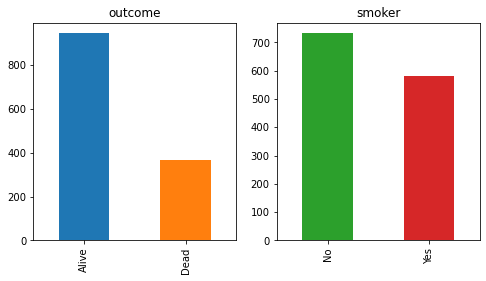

In [34]:
pp.figure(figsize=(8, 4))
pp.subplot(1, 2, 1); pp.title('outcome');
smoking['outcome'].value_counts().plot(kind = 'bar', color = ['C0', 'C1'], sharex=False)
pp.subplot(1, 2, 2); pp.title('smoker');
smoking['smoker'].value_counts().plot(kind = 'bar', color = ['C2', 'C3'], sharex=False)

<AxesSubplot:title={'center':'smoker'}>

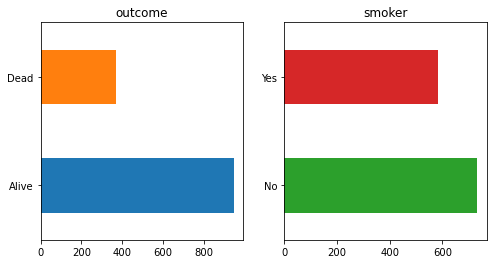

In [39]:
pp.figure(figsize=(8, 4))
pp.subplot(1, 2, 1); pp.title('outcome');
smoking['outcome'].value_counts().plot(kind = 'barh', color = ['C0', 'C1'], sharex=False)
pp.subplot(1, 2, 2); pp.title('smoker');
smoking['smoker'].value_counts().plot(kind = 'barh', color = ['C2', 'C3'], sharex=False)

<AxesSubplot:title={'center':'smoker'}, ylabel='smoker'>

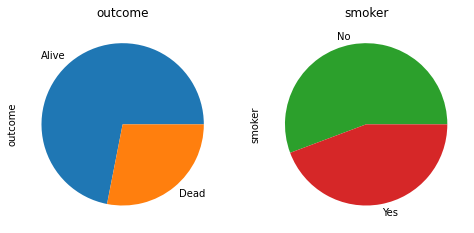

In [37]:
pp.figure(figsize=(8, 4))
pp.subplot(1, 2, 1); pp.title('outcome');
smoking['outcome'].value_counts().plot(kind = 'pie', colors = ['C0', 'C1'], sharex=False)
pp.subplot(1, 2, 2); pp.title('smoker');
smoking['smoker'].value_counts().plot(kind = 'pie', colors = ['C2', 'C3'], sharex=False)

<AxesSubplot:xlabel='smoker,outcome'>

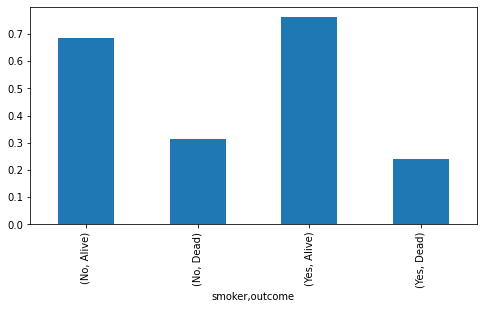

In [40]:
pp.figure(figsize=(8, 4))
bysmoker.plot(kind = 'bar')


In [41]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


<AxesSubplot:xlabel='smoker'>

<Figure size 576x288 with 0 Axes>

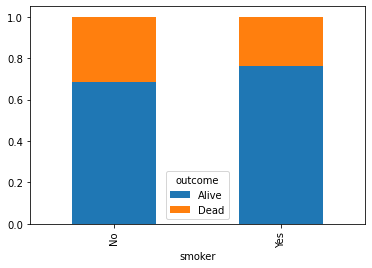

In [46]:
pp.figure(figsize=(8, 4))
bysmoker.unstack().plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='ageGroup,smoker'>

<Figure size 576x288 with 0 Axes>

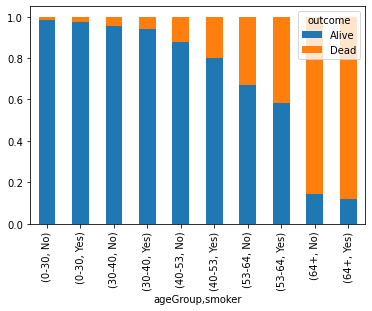

In [48]:
pp.figure(figsize=(8, 4))
byage.unstack().plot(kind = 'bar', stacked = True)

In [51]:
byage.unstack().drop("Dead", axis = 1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645
64+       0.145078  0.120000

In [53]:
byage2 = byage.unstack().drop("Dead", axis = 1).unstack()
byage2.columns = ["No", "Yes"]
byage2.columns.name = "smoker"
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645
64+,0.145078,0.120000


Text(0.5, 1.0, 'Probability of staying Alive')

<Figure size 576x288 with 0 Axes>

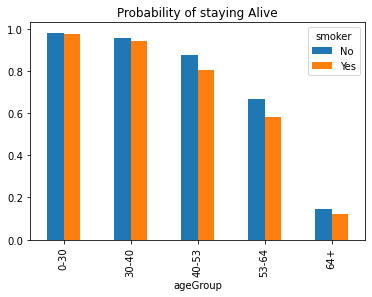

In [58]:
pp.figure(figsize=(8, 4))
byage2.plot(kind = 'bar', stacked = False);pp.title('Probability of staying Alive')